In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data\ex1data1.txt',header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


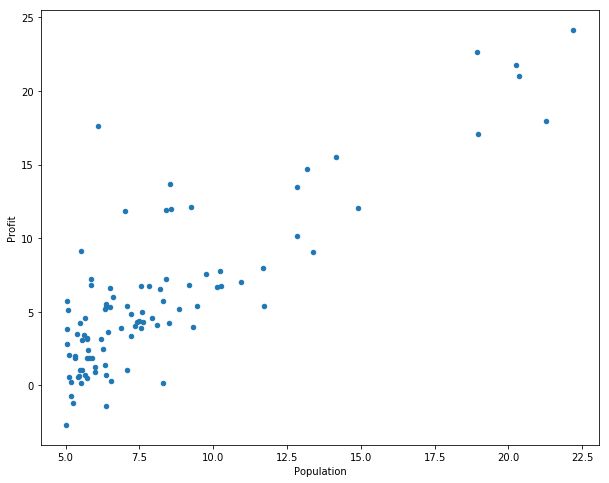

In [7]:
data.plot(x='Population',y='Profit',kind='scatter',figsize=(10,8))

In [9]:
def cost(X,y,theta):
    squared_error_vector = np.power(((X*theta.T)-y),2)
    return np.sum(squared_error_vector)/(2*len(X)*1.0)

In [10]:
data.insert(1,'ones',1)
data.head()

,Population,ones,Profit
0,6.1101,1,17.5920
1,5.5277,1,9.1302
2,8.5186,1,13.6620
3,7.0032,1,11.8540
4,5.8598,1,6.8233


In [21]:
cols = data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [15]:
X.head()

,Population,ones
0,6.1101,1
1,5.5277,1
2,8.5186,1
3,7.0032,1
4,5.8598,1


In [18]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [22]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [24]:
theta

matrix([[0, 0]])

In [26]:
cost(X,y,theta)

32.072733877455676

In [40]:
def gradient_descent(X,y,theta,iters,learning_rate):
    temp = np.matrix(np.zeros(theta.shape))
    no_of_params = int(theta.ravel().shape[1])
    iter_cost = np.zeros(iters)
    
    for i in  range(iters):
        error = (X*theta.T)-y
        
        for j in range(no_of_params):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - (learning_rate/len(X))*np.sum(term)
        theta = temp
        iter_cost[i] = cost(X,y,theta)
        
    return theta,iter_cost

In [43]:
learning_rate = 0.01
iters = 1000

In [45]:
optimal_theta,optimal_cost = gradient_descent(X,y,theta,iters,learning_rate)
optimal_theta

matrix([[ 1.1272942 , -3.24140214]])

In [48]:
cost(X,y,optimal_theta)

4.5159555030789118

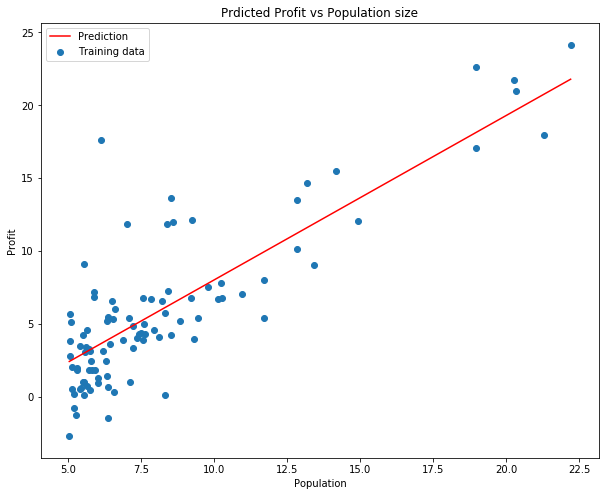

In [52]:
x=np.linspace(data['Population'].min(),data['Population'].max(),120)
f = optimal_theta[0,1]+optimal_theta[0,0]*x
fig , ax = plt.subplots(figsize = (10,8))
ax.plot(x,f,'r',label = 'Prediction')
ax.scatter(data['Population'],data['Profit'],label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Prdicted Profit vs Population size')

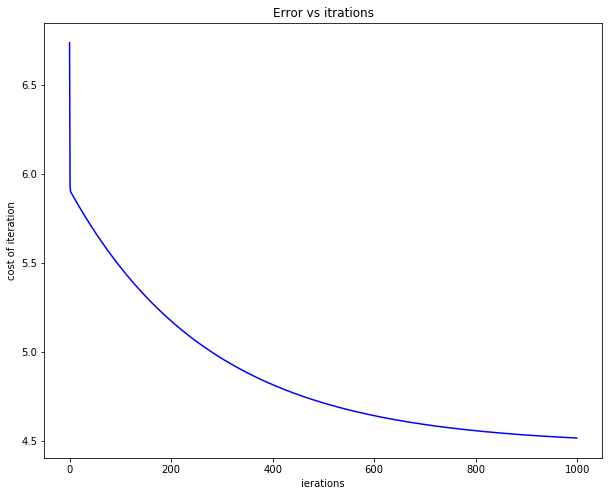

In [54]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(np.arange(iters),optimal_cost,'b')
ax.set_xlabel('ierations')
ax.set_ylabel('cost of iteration')
ax.set_title('Error vs itrations')